In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

def get_frames_at_pc(trj, trjname, state, pc, lineage, tolerance = 1):

    mint = -1
    maxt = -1

    mindist_t = -1
    mindist = 999
    minframe = []
    
    for t, frame in enumerate(trj.transpose()):
        #print(frame)

        if abs(frame[1]-pc) < mindist:
            mindist = abs(frame[1]-pc)
            minframe = frame
            mindist_t = t+1
        
        if abs(frame[1]-pc) < tolerance:
            if mint == -1:
                mint = t
                maxt = t
            else:
                maxt = t

    print("iteration closest to target pc")
    print(mindist_t)
    print(minframe)
    print(f"frame index range within pc range of target pc: {mint*3}-{maxt*3}") #as three frames are saved per iteration

    print(f"scp jborowsky@x01.ucsf.edu:/media/X01Raid01/Data_Backup/home/jborowsky/cftr-analysis/independent-partial-dissociation/\
{trjname}/{lineage.split('-')[0].zfill(6)}-{lineage.split('-')[1].zfill(6)}-ancestors/\
{str(mindist_t).zfill(6)}-{str(int(minframe[0])).zfill(6)}-traj_comp.xtc {state}-\
{str(mindist_t).zfill(6)}-{str(int(minframe[0])).zfill(6)}-traj_comp.xtc")

lip_glpg_1

1798-87
iteration closest to target pc
1386
[82.          5.66876268]
frame index range within pc range of target pc: 4146-4173
scp jborowsky@x01.ucsf.edu:/media/X01Raid01/Data_Backup/home/jborowsky/cftr-analysis/independent-partial-dissociation/lip_glpg_1/001798-000087-ancestors/001386-000082-traj_comp.xtc top-001386-000082-traj_comp.xtc

2013-132
iteration closest to target pc
1493
[82.          5.53592491]
frame index range within pc range of target pc: 4458-4623
scp jborowsky@x01.ucsf.edu:/media/X01Raid01/Data_Backup/home/jborowsky/cftr-analysis/independent-partial-dissociation/lip_glpg_1/002013-000132-ancestors/001493-000082-traj_comp.xtc top-001493-000082-traj_comp.xtc


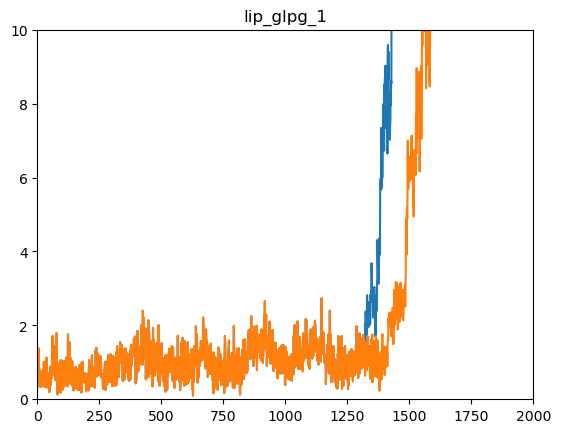

In [7]:
fns = {"lip_glpg_1":[{"well":2.2, "shoulder":4.0, "top":5.5}, ["1798-87", "2013-132"]],
       "lip_glpg_2":[{"well":2.2, "shoulder":6.2, "top":7.5}, ["1986-211"]],
       "nonlip_glpg_1":[0, [""]],
       "nonlip_glpg_2":[0, [""]]}

trjname = "lip_glpg_1"
state = "top"

trjs = [np.load(f"/home/jonathan/Documents/grabelab/cftr/independent-partial-dissociation/{trjname}/{fn}-ancestry.npy") for fn in fns[trjname][1]]

print(trjname)

for ti, trj in enumerate(trjs):
    print("")

    plt.plot(trj[1])
    #the value at [:][0] is the walker id, which is meaningless here
    plt.ylim(0,10)
    plt.xlim(0, 2000)
    plt.title(trjname)
    #if orthogonal degrees of freedom are suspected, 
    # it might make sense to require trajectory branches to exit macrostate A 
    # separated by an amount of time equal to at least the relaxation time 
    # of the degree of freedom in question in order to be considered potentially independent
    print(fns[trjname][1][ti])
    get_frames_at_pc(trj, trjname, state, fns[trjname][0][state], fns[trjname][1][ti])

